# Multi-Family Collection

In [1]:
# Import libraries
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option("display.precision", 2)

In [2]:
# Treatment processes
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}
Treatment_processes['TS'] = {'input_type':ProcessMetaData['TS']['InputType'] , 'model':sppm.TS()}

# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'TS', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=20)
data['Heavy Duty Truck'].loc['LF', 'TS'] = 0.0
data['Heavy Duty Truck'].loc[:, 'Collection'] = [30, 30, 30, 30, 30, 30, 30, None]
distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,TS,Collection
LF,NaN,20.0,20.0,20.0,20.0,20.0,0.0,30.0
Composting,NaN,NaN,20.0,20.0,20.0,20.0,20.0,30.0
AD,NaN,NaN,NaN,20.0,20.0,20.0,20.0,30.0
WTE,NaN,NaN,NaN,NaN,20.0,20.0,20.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,20.0,20.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0
TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Collection Schemes

* **Residual waste collection**
    * Midex Resiudal Waste Collection (RWC)
    * Organics (ORG) + Dry Residuals (DryRes)
    * Recyclables (REC) + Wet Residuals (WetRes)
* **Source separated services for recyclables**
    * Single Stream Recyclables (SSR)
    * Dual Stream Recyclables (DSR) 
    * Multi Stream Recyclables (MSR)
    * Multi Stream Recyclables Dropoff (MSRDO)
* **Source separated services for yard waste**
    * Source separated Yard Waste (SSYW)
    * Source separated Organics (SSO)  (Food & Yard waste)

##  Capture rate for each waste component for each collection process

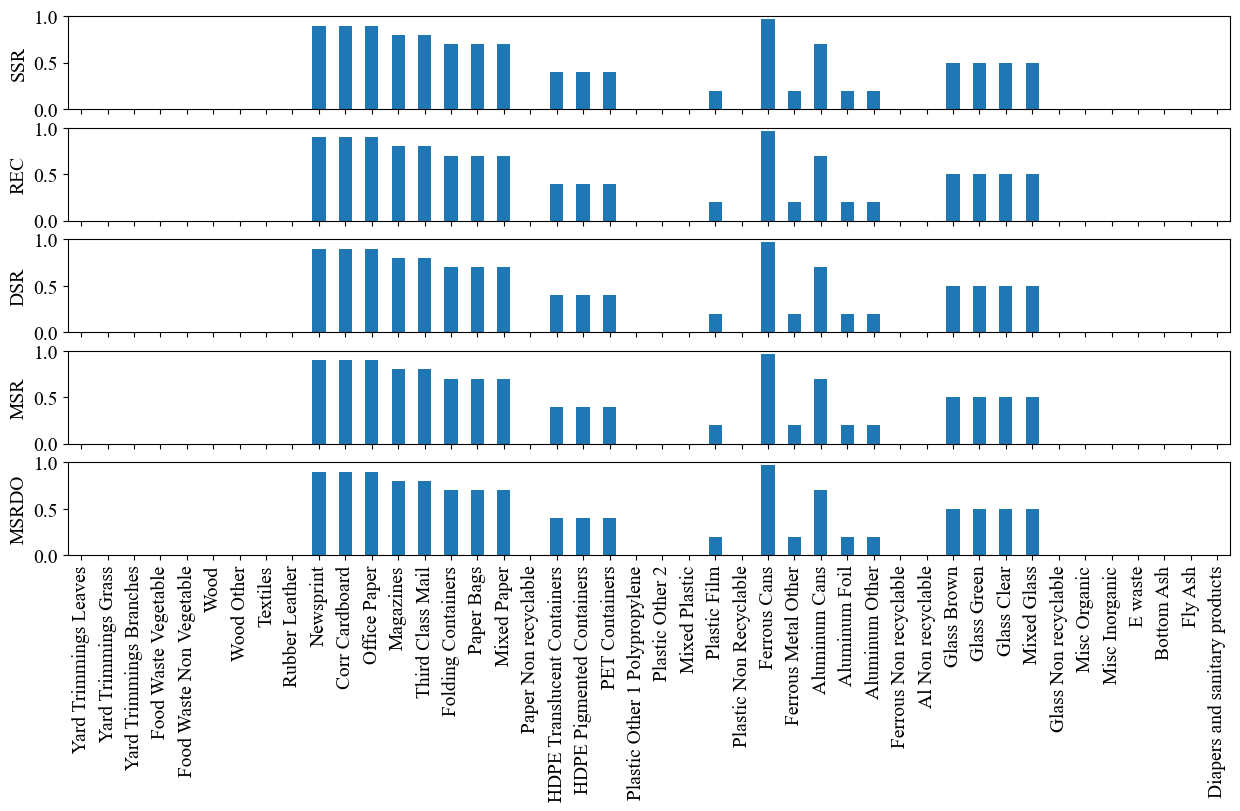

In [3]:
inputdata = spid.MF_Col_Input()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15, 7), sharex=True)

inputdata.process_data['SSR'].plot(kind='bar', ax=ax1)
ax1.set_ylabel('SSR')
ax1.set_ylim((0,1))
inputdata.process_data['REC'].plot(kind='bar', ax=ax2)
ax2.set_ylabel('REC')
ax2.set_ylim((0,1))
inputdata.process_data['DSR'].plot(kind='bar', ax=ax3)
ax3.set_ylabel('DSR')
ax3.set_ylim((0,1))
inputdata.process_data['MSR'].plot(kind='bar', ax=ax4)
ax4.set_ylabel('MSR')
ax4.set_ylim((0,1))
inputdata.process_data['MSRDO'].plot(kind='bar', ax=ax5)
ax5.set_ylabel('MSRDO')
ax5.set_ylim((0,1))

lables = ax4.xaxis.set_ticklabels([x.replace('_', ' ') for x in inputdata.process_data.index], rotation=90)

In [4]:
inputdata.process_data.loc[inputdata.process_data.index[9:38], ['SSR', 'REC', 'DSR', 'MSR', 'MSRDO']]

,SSR,REC,DSR,MSR,MSRDO
Newsprint,0.90,0.90,0.90,0.90,0.90
Corr_Cardboard,0.90,0.90,0.90,0.90,0.90
Office_Paper,0.90,0.90,0.90,0.90,0.90
Magazines,0.80,0.80,0.80,0.80,0.80
Third_Class_Mail,0.80,0.80,0.80,0.80,0.80
Folding_Containers,0.70,0.70,0.70,0.70,0.70
Paper_Bags,0.70,0.70,0.70,0.70,0.70
Mixed_Paper,0.70,0.70,0.70,0.70,0.70
Paper_Non_recyclable,0.00,0.00,0.00,0.00,0.00
HDPE_Translucent_Containers,0.40,0.40,0.40,0.40,0.40


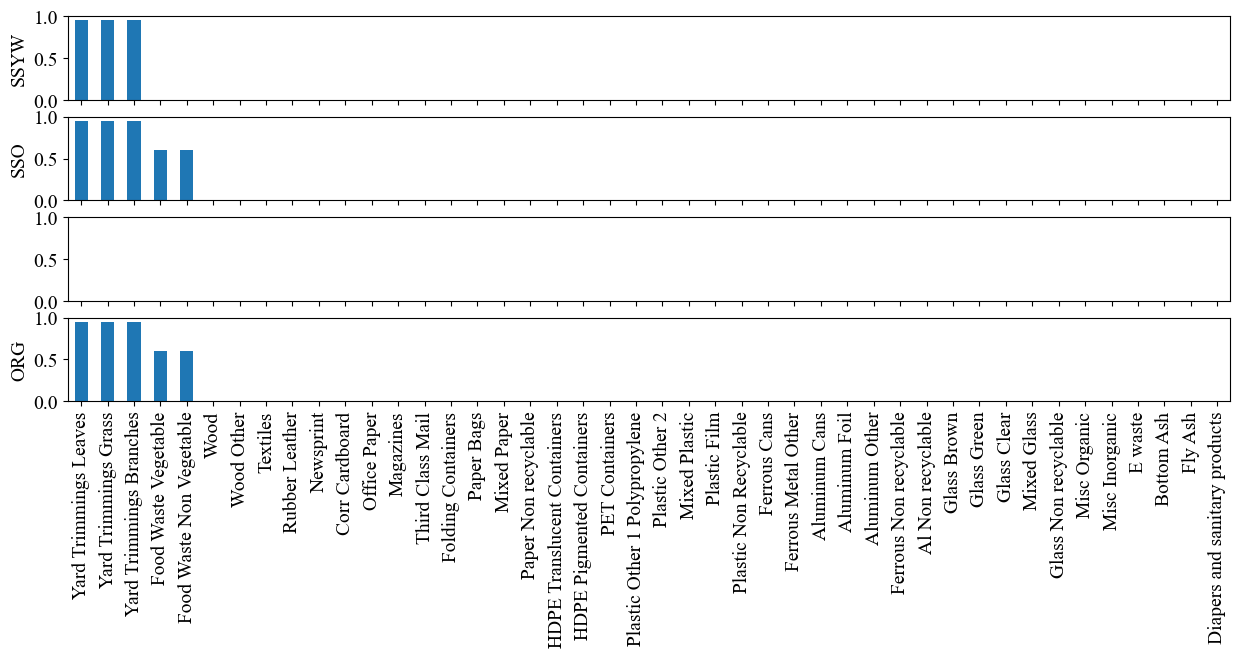

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15, 5), sharex=True)

inputdata.process_data['SSYW'].plot(kind='bar', ax=ax1)
ax1.set_ylabel('SSYW')
ax1.set_ylim((0,1))
inputdata.process_data['SSO'].plot(kind='bar', ax=ax2)
ax2.set_ylabel('SSO')
ax2.set_ylim((0,1))
inputdata.process_data['ORG'].plot(kind='bar', ax=ax4)
ax4.set_ylabel('ORG')
ax4.set_ylim((0,1))

lables = ax3.xaxis.set_ticklabels([x.replace('_', ' ') for x in inputdata.process_data.index], rotation=90)

In [6]:
inputdata.process_data.loc[inputdata.process_data.index[0:5], ['SSYW', 'SSO', 'ORG']]

,SSYW,SSO,ORG
Yard_Trimmings_Leaves,0.95,0.95,0.95
Yard_Trimmings_Grass,0.95,0.95,0.95
Yard_Trimmings_Branches,0.95,0.95,0.95
Food_Waste_Vegetable,0.00,0.60,0.60
Food_Waste_Non_Vegetable,0.00,0.60,0.60


## Collected waste in each scheme

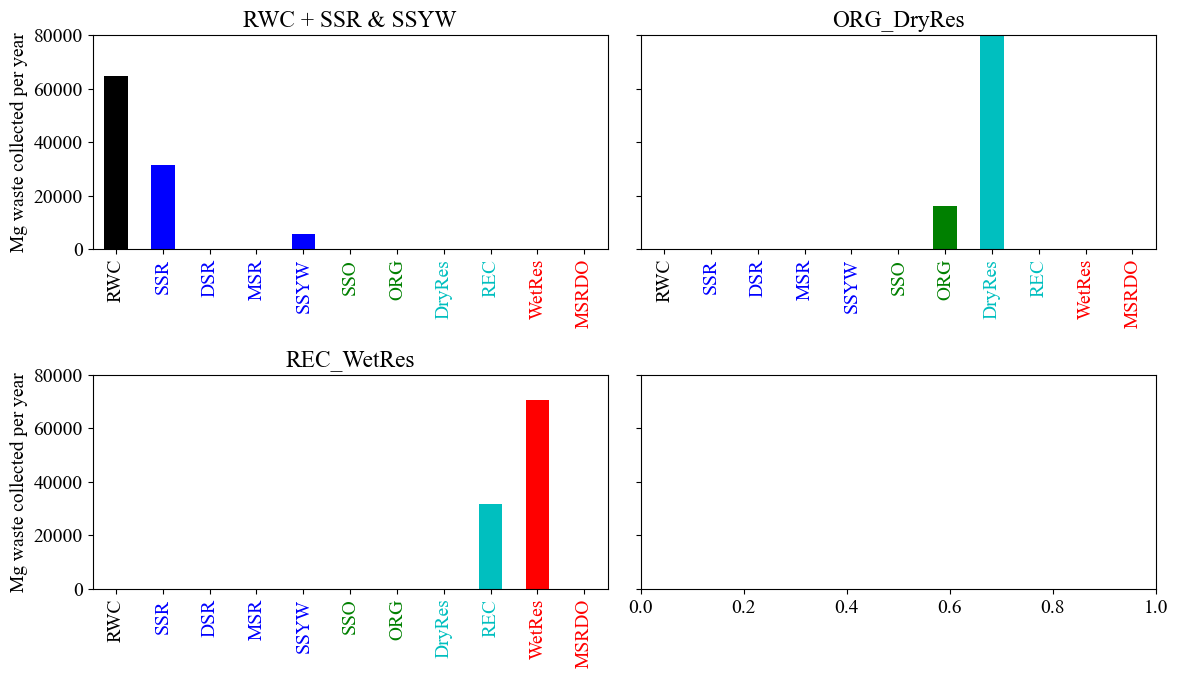

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 7), sharey=True)

colors = ['k', 'b', 'b', 'b', 'b', 'g', 'g', 'c', 'c', 'r', 'r', 'y']

# Ax1: RWC
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'SSYW', 'SSR')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax1, color=colors)
ax1.set_ylabel('Mg waste collected per year')
ax1.set_title('RWC + SSR & SSYW')

# Ax2: ORG_DryRes
scheme=sppm.MF_Col.scheme()
scheme[('ORG_DryRes', 'N/A', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax2, color=colors)
ax2.set_ylabel('Mg waste collected per year')
ax2.set_title('ORG_DryRes')

# Ax3: REC_WetRes
scheme=sppm.MF_Col.scheme()
scheme[('REC_WetRes', 'N/A', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax3, color=colors)
ax3.set_ylabel('Mg waste collected per year')
ax3.set_title('REC_WetRes')

for ax in [ax1, ax2, ax3]:
    for i,j in enumerate(ax.get_xticklabels()):
        j.set_color(colors[i])
        ax.set_ylim((0,80000))
    
fig.tight_layout()

## Diesel fuel use and cost in different collection schemes

In [8]:
Total_Fuel = pd.DataFrame(columns=['Total Fuel'])
Opr_Cost = pd.DataFrame(columns=['Operation Cost'])

# RWC
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'N/A', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'N/A', 'SSR')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSYW
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'SSYW', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSYW',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSYW',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSO
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'SSO', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSO',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSO',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR & SSYW
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'SSYW', 'SSR')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR & SSYW',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR & SSYW',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR & SSO
scheme=sppm.MF_Col.scheme()
scheme[('RWC', 'SSO', 'SSR')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR & SSO',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR & SSO',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# ORG_DryRes
scheme=sppm.MF_Col.scheme()
scheme[('ORG_DryRes', 'ORG_DryRes', 'N/A')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['ORG_DryRes',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['ORG_DryRes',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# ORG_DryRes + SSR
scheme=sppm.MF_Col.scheme()
scheme[('ORG_DryRes', 'ORG_DryRes', 'SSR')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['ORG_DryRes + SSR',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['ORG_DryRes + SSR',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# REC_WetRes
scheme=sppm.MF_Col.scheme()
scheme[('REC_WetRes', 'N/A', 'REC_WetRes')] = 1
model = sppm.MF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['REC_WetRes',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['REC_WetRes',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

### Fuel use

,Total Fuel
RWC,3.46
ORG_DryRes,3.72
REC_WetRes,3.72
RWC + SSYW,3.83
RWC + SSO,4.29
RWC + SSR,4.42
ORG_DryRes + SSR,4.59
RWC + SSR & SSYW,4.78
RWC + SSR & SSO,5.25


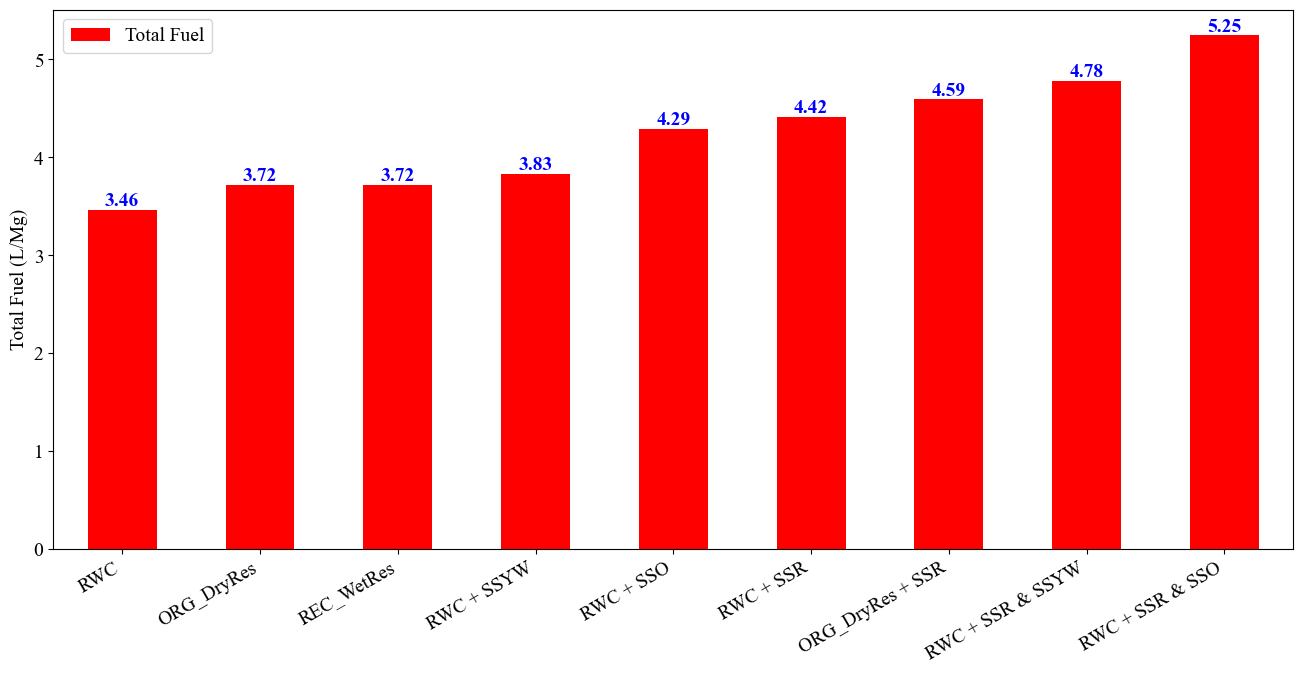

In [9]:
fig, ax = plt.subplots(figsize=(16, 7))
Total_Fuel.sort_values(by='Total Fuel', inplace=True)
Total_Fuel.plot(kind='bar', ax=ax, color='r')
xticklabels = ax.set_xticklabels(Total_Fuel.index, rotation=30, horizontalalignment='right')
ylabel = ax.set_ylabel('Total Fuel (L/Mg)')

for i, j in enumerate(Total_Fuel.index):
    ax.text(i, Total_Fuel['Total Fuel'][j], str(round(Total_Fuel['Total Fuel'][j],2)),
            ha='center', va='bottom',
            color='blue', fontweight='bold')
Total_Fuel

## Cost

,Operation Cost
RWC,9.91
RWC + SSYW,11.7
RWC + SSO,12.67
RWC + SSR,12.83
RWC + SSR & SSYW,14.62
RWC + SSR & SSO,15.59
ORG_DryRes,17.79
REC_WetRes,17.79
ORG_DryRes + SSR,18.46


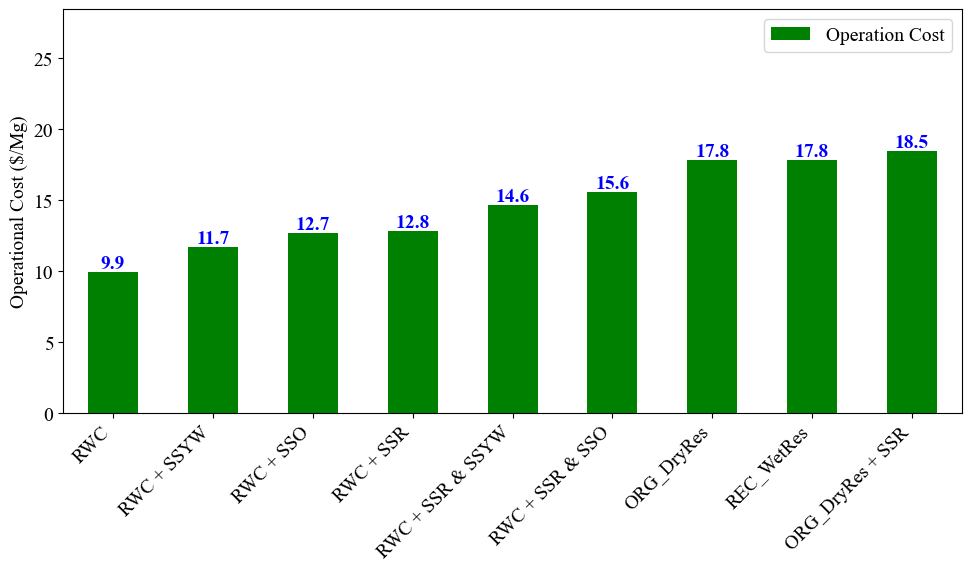

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
Opr_Cost.sort_values(by='Operation Cost', inplace=True)
Opr_Cost.plot(kind='bar', ax=ax, color='g')
xticklabels = ax.set_xticklabels(Opr_Cost.index, rotation=45, horizontalalignment='right')
ylabel = ax.set_ylabel('Operational Cost ($/Mg)')

for i, j in enumerate(Opr_Cost.index):
    ax.text(i, Opr_Cost['Operation Cost'][j], str(round(Opr_Cost['Operation Cost'][j],1)),
            ha='center', va='bottom',
            color='blue', fontweight='bold')
ax.set_ylim((0, max(Opr_Cost['Operation Cost']) + 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"
fig.tight_layout()
fig.savefig(dpi=300, fname='Cost_Col')

Opr_Cost